### Задача №1

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат. В качестве ответа запишите значение коэффициента детерминации для модели на этих признаках.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
x = np.array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])

In [3]:
y = np.array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

Выбераем два признака из четырех

In [4]:
x1 = x[:, [0,1]]
x2 = x[:, [0,2]]
x3 = x[:, [0,3]]
x4 = x[:, [1,2]]
x5 = x[:, [1,3]]
x6 = x[:, [2,3]]

In [5]:
all_x2 = [x1, x2, x3, x4, x5, x6]

Определяем коэффициент детерминации

In [6]:
def sum_of_squares(samples: np.ndarray) -> float:
    """Сумма квадратов отклонений.
    """
    
    return ((samples - samples.mean()) ** 2).sum()

Считаем коэффициент детерминации

In [7]:
for i in range(0, 6):
    lr = LinearRegression(fit_intercept=True).fit(all_x2[i], y)
    b = lr.coef_
    e = y - (all_x2[i]).dot(b)
    r = 1 - sum_of_squares(e) / sum_of_squares(y)
    print(f'R{i+1} = {r}')

R1 = 0.18113594742585215
R2 = 0.763424623879315
R3 = 0.4532966783144078
R4 = 0.5479482734039008
R5 = 0.6062055761129932
R6 = 0.622441987650532


#### Таким оразом видим, что максимальный уровень линейной зависимости целевой переменной равен R2 = 0,7634346 у признака Х2

### Задача №2

#### Является ли значимым уравнение регрессии, полученное в предыдущей задаче? В качестве ответа запишите 1, если является, и 0 иначе.

Проверка значимости линейной регрессии осуществляется с помощью F-теста Фисшера
При F-тесте используется статистика:
$$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)},$$
где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $m$ — число факторов. Такая статистика в предположении верности нулевой гипотезы имеет __F-распределение Фишера__ с параметрами $k_1 = m$, $k_2 = n - m - 1$.

In [8]:
n = x2.shape[0]
m = 2
R2 = 0.763424623879315

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

In [9]:
from scipy import stats
from matplotlib import pyplot as plt

In [10]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

Критическая область: $$\Omega_\alpha = \left( 4.74, \infty \right)$$

(0.0, 0.5)

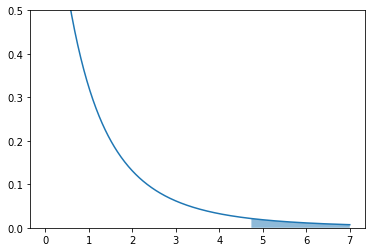

In [11]:
ox = np.linspace(0, 7, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 7, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

plt.ylim(0, 0.5)

Считаем значение статистики

In [12]:
F = (R2 / k1) / ((1 - R2) / k2)
F

11.294439122922636

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

#### Ответ: 1

### Задача №3

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`? В качестве ответа запишите 1, если является, и 0 иначе.

_Подсказка_. Реализуйте двухвыборочный t-тест. В качестве выборок здесь можно взять наборы меток совершения покупки (0 или 1) каждым посетителем.

Для проверки данной гипотезы используется следующая статистика:
$$t = \dfrac{\overline{X_1} - \overline{X_2}}{\sigma_\Delta}$$

$\sigma_\Delta$ Опрееляется по формуле: $$\sigma_\Delta = \sqrt{\dfrac{\sigma_{X_1}^2}{n_1} + \dfrac{\sigma_{X_2}^2}{n_2}}$$

In [13]:
n1 = 2509
n2 = 1465
alpha = 0.05

In [14]:
x1 = np.hstack((np.zeros(n1 - 77), np.ones(77)))
x2 = np.hstack((np.zeros(n2 - 60), np.ones(60)))

Определяем значение $\sigma_\Delta$:

In [15]:
s1 = x1.std(ddof=1)
s2 = x2.std(ddof=1)

In [16]:
s_delta = np.sqrt(s1 ** 2 / n1 + s2 ** 2 / n2)
s_delta

0.006220171278295827

Определяем значение статистики:

In [17]:
t = (x1.mean() - x2.mean()) / s_delta
t

-1.6504551408398205

Определяем квантили распределения Стьюдента: $$df = \dfrac{\left( \dfrac{\sigma_{X_1}^2}{n_1} + \dfrac{\sigma_{X_2}^2}{n_2} \right)^2}{\dfrac{\left( \sigma_{X_1}^2 / n_1 \right)^2}{n_1 - 1} + \dfrac{\left( \sigma_{X_2}^2 / n_2 \right)^2}{n_2 - 1}}$$

In [18]:
df = (s1 ** 2 / n1 + s2 ** 2 / n2) ** 2 / \
    ((s1 ** 2 / n1) ** 2 / (n1 - 1) + (s2 ** 2 / n2) ** 2 / (n2 - 1))

df

2732.8025644352133

In [19]:
t1 = stats.t.ppf(alpha / 2, df=df)
t2 = stats.t.ppf(1 - alpha / 2, df=df)

t1, t2

(-1.9608324352746576, 1.9608324352746571)

Критическая область имеет вид:
$$\Omega_\alpha = (-\infty, -1.96) \cup (1.96, \infty)$$

Значение статистики t не попало в критическую область, следовательно отличие конверсии на страницах `A` и `B` не является значимым

Проверка через готовую реализацию:

In [20]:
stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-1.6504551408398205, pvalue=0.09896479217925898)

#### Ответ: 0